<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Decision/DecisionTree_TitanicDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydotplus

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from math import log2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('/content/Titanicdata.csv')

In [83]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [85]:
df = df.dropna(how='any',axis=0)

In [86]:
df = df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [87]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [88]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [89]:
df['Embarked'].value_counts()

,count
Embarked,
S,116
C,65
Q,2


In [90]:
sex ={'male' :0 , 'female':1}
df['Sex_encode']=df['Sex'].map(sex)
embark ={'S' :0 , 'C':1, 'Q':2}
df['Embarked_encode']=df['Embarked'].map(embark)

In [91]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encode,Embarked_encode
1,1,1,female,38.0,1,0,71.2833,C,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
6,0,1,male,54.0,0,0,51.8625,S,0,0
10,1,3,female,4.0,1,1,16.7000,S,1,0
11,1,1,female,58.0,0,0,26.5500,S,1,0


In [92]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,Embarked_encode
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.480874,0.377049
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.501005,0.508086
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000,0.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,2.000000


In [93]:
df['Age_encode']=pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80], labels=[0,1,2,3,4,5,6,7], include_lowest=True)
df['Fare_encode']=pd.cut(df['Fare'], bins=[0,50,100,150,200,250,300,350,400,450,500,550], labels=[0,1,2,3,4,5,6,7,8,9,10], include_lowest=True)

In [94]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encode,Embarked_encode,Age_encode,Fare_encode
1,1,1,female,38.0,1,0,71.2833,C,1,1,3,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,3,1
6,0,1,male,54.0,0,0,51.8625,S,0,0,5,1
10,1,3,female,4.0,1,1,16.7000,S,1,0,0,0
11,1,1,female,58.0,0,0,26.5500,S,1,0,5,0


<Axes: >

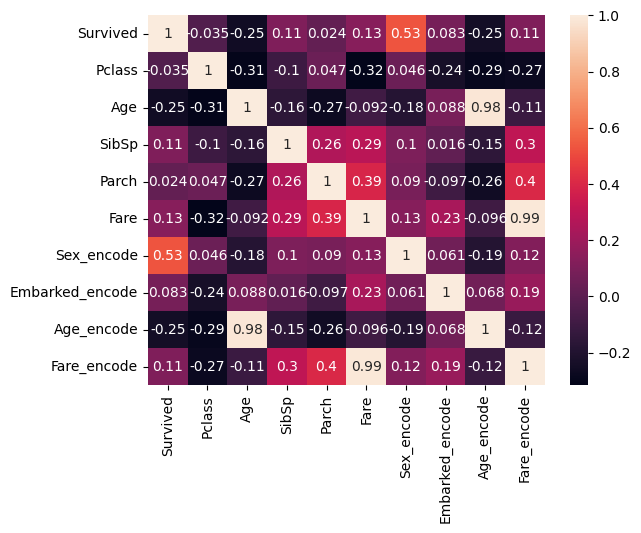

In [95]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
corr =df[num].corr()
sns.heatmap(corr, annot=True)

In [96]:
import numpy as np

In [97]:
y= df['Survived']
X = df[['Sex_encode','Fare_encode','Embarked_encode']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [99]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [118]:
print(model.predict([[0,1,0]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


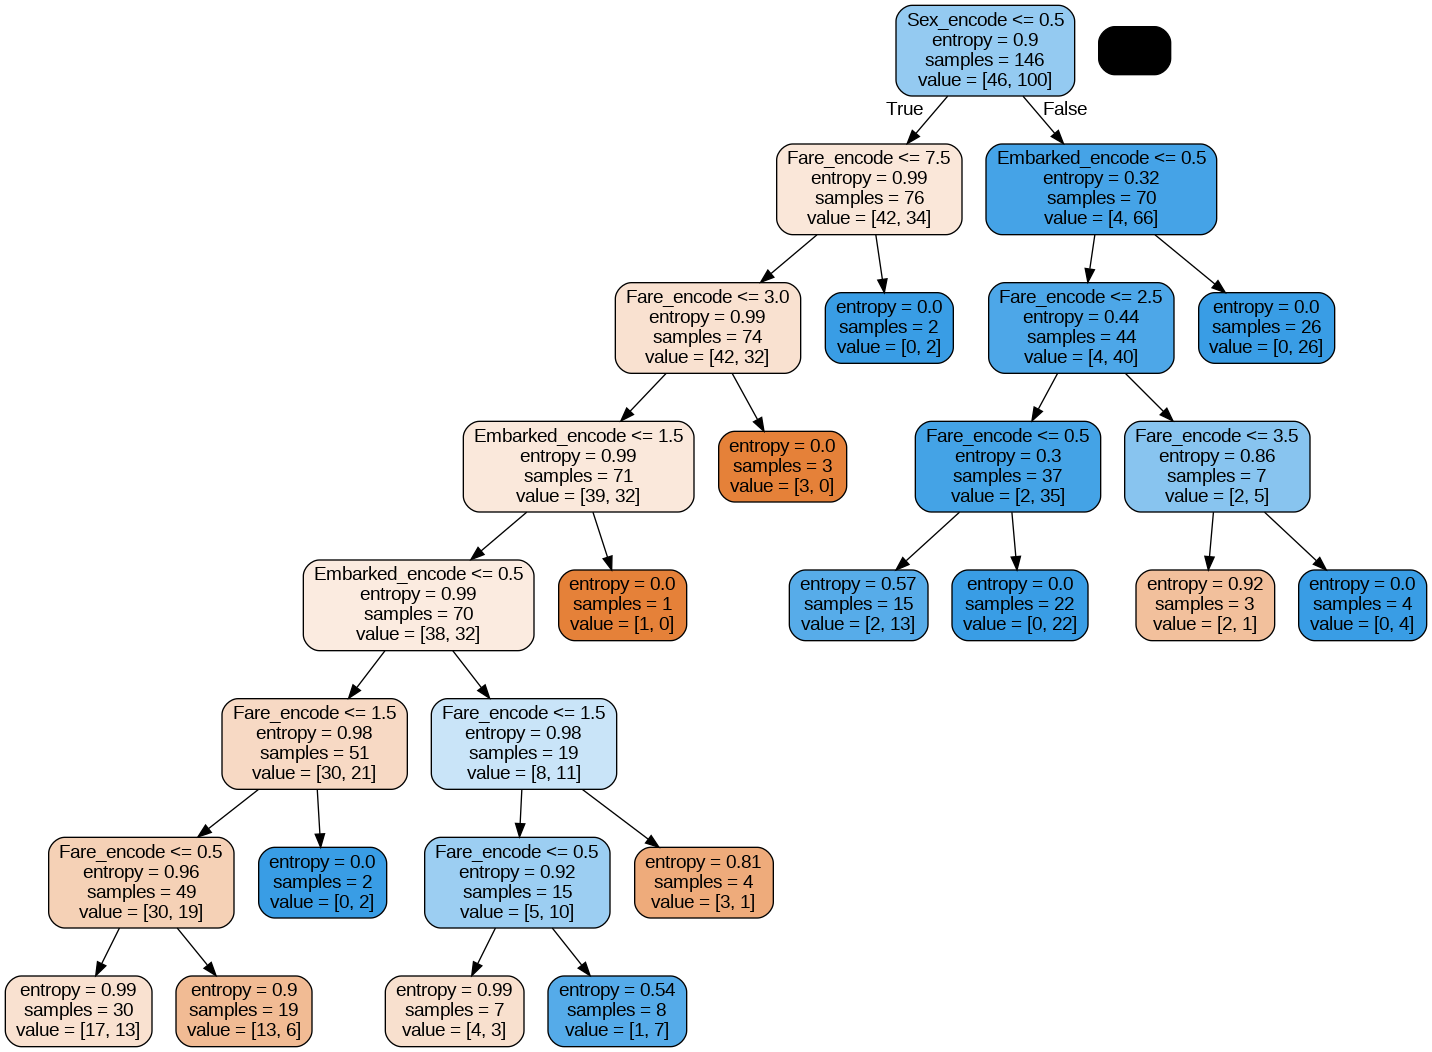

In [100]:
dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [102]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Sex_encode,0
Embarked_encode,0


In [ ]:
df.describe()

In [110]:
import pandas as pd
import math

# function to calculate entropy
def entropy(column):
  counts = column.value_counts()
  propabilities = counts/ len(column)
  return -sum(propabilities * propabilities.apply(math.log2))

# function to calculate conditional entropy
def conditional_entropy(data, feature , target):
  feature_values = data[feature].unique()
  #print(feature_values)
  weighted_entropy =0
  for value in feature_values:
   # print(value)
    subset = data[data[feature] ==  value]
    #print(subset)
    weighted_entropy += (len(subset)/ len(data)) * entropy(subset[target])
    return weighted_entropy

# function to calculate information gain
def information_gain(data, feature, target):
  total_entropy = entropy(data[target])
 # print(total_entropy)
  feature_conditional_entropy = conditional_entropy(data, feature, target)
  #print(feature_conditional_entropy)
  return total_entropy - feature_conditional_entropy

# calculate information gain for each feature
for feature in X:
  ig = information_gain(df, feature, 'Survived')
  print(f"Information gain for {feature}: {ig}")

Information gain for Sex_encode: 0.7400514068615837
Information gain for Fare_encode: 0.5876054269217195
Information gain for Embarked_encode: 0.6182596229604584
